#### Install yfinance

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 33.9 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Forecasting Stocks from Yahoo Finance with Prophet

In [7]:
import yfinance as yf

# berkshire hathaway inc. (b stock)
brk = yf.Ticker('AMZN')

hist = brk.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000,0,0.0
1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000,0,0.0
1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800,0,0.0
1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200,0,0.0
1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200,0,0.0
...,...,...,...,...,...,...,...
2022-04-25,2880.459961,2924.429932,2846.129883,2921.479980,3093700,0,0.0
2022-04-26,2896.000000,2897.120117,2778.590088,2787.820068,3876500,0,0.0
2022-04-27,2803.830078,2838.969971,2715.669922,2763.340088,3566800,0,0.0


In [8]:
import pandas as pd

df = pd.DataFrame()

df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail()

,ds,y
6277,2022-04-25,2921.479980
6278,2022-04-26,2787.820068
6279,2022-04-27,2763.340088
6280,2022-04-28,2891.929932
6281,2022-04-29,2503.649902


In [9]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=False)

m.fit(df)

In [10]:
future = m.make_future_dataframe(365, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
6640,2023-04-23,4123.991423,3943.475894,4301.379458
6641,2023-04-24,4118.439706,3939.957202,4295.008569
6642,2023-04-25,4123.406301,3954.423225,4300.015330
6643,2023-04-26,4126.932890,3947.844237,4302.990907
6644,2023-04-27,4129.409814,3962.511506,4305.985557
6645,2023-04-28,4130.095124,3948.325645,4305.964182
6646,2023-04-29,4142.912936,3983.954130,4313.040219


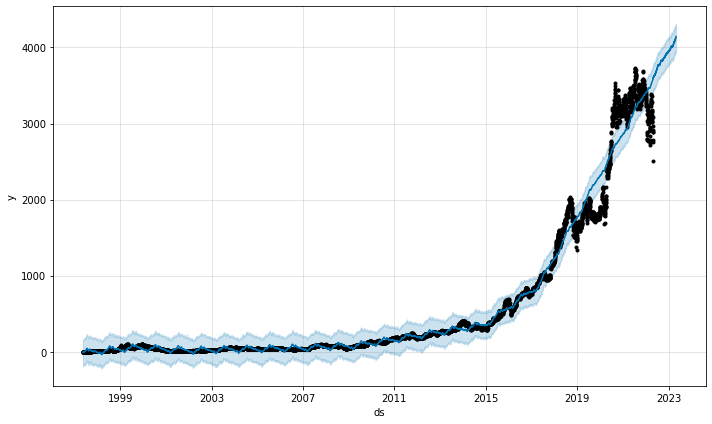

In [11]:
m.plot(forecast);

## Make it a Function

In [12]:
def forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
  
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

#### Make some Forecasts with that Function

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-08-19,62.899851,-88.479208,225.550221,62.899851,62.899851,14.659980,14.659980,14.659980,3.316208,3.316208,3.316208,11.343772,11.343772,11.343772,0.0,0.0,0.0,77.559831
1,2004-08-20,63.117083,-78.005966,241.310128,63.117083,63.117083,14.998063,14.998063,14.998063,3.337385,3.337385,3.337385,11.660678,11.660678,11.660678,0.0,0.0,0.0,78.115146
2,2004-08-23,63.768778,-71.848985,225.647528,63.768778,63.768778,14.557787,14.557787,14.557787,1.682205,1.682205,1.682205,12.875583,12.875583,12.875583,0.0,0.0,0.0,78.326565
3,2004-08-24,63.986010,-64.163790,228.263236,63.986010,63.986010,15.215764,15.215764,15.215764,1.894194,1.894194,1.894194,13.321569,13.321569,13.321569,0.0,0.0,0.0,79.201773
4,2004-08-25,64.203241,-76.184364,233.665021,64.203241,64.203241,16.860452,16.860452,16.860452,3.096921,3.096921,3.096921,13.763532,13.763532,13.763532,0.0,0.0,0.0,81.063694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,2022-10-22,3036.966046,2878.089188,3195.311387,3014.460310,3060.144860,4.920823,4.920823,4.920823,-6.663455,-6.663455,-6.663455,11.584278,11.584278,11.584278,0.0,0.0,0.0,3041.886869
4632,2022-10-23,3038.472551,2893.378626,3204.456069,3015.756732,3061.918067,6.340327,6.340327,6.340327,-6.663457,-6.663457,-6.663457,13.003784,13.003784,13.003784,0.0,0.0,0.0,3044.812878
4633,2022-10-24,3039.979057,2902.156011,3211.408991,3017.053153,3063.590305,16.095868,16.095868,16.095868,1.682205,1.682205,1.682205,14.413663,14.413663,14.413663,0.0,0.0,0.0,3056.074925
4634,2022-10-25,3041.485562,2899.731434,3228.454555,3018.379289,3065.682901,17.695449,17.695449,17.695449,1.894194,1.894194,1.894194,15.801255,15.801255,15.801255,0.0,0.0,0.0,3059.181011


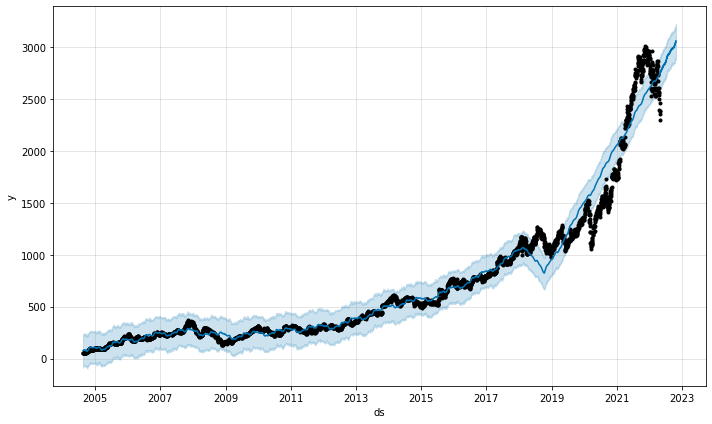

In [13]:
# GOOGLE stocks forecasting
forecast('GOOG', 180)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2627,2024-04-24,75.403575,48.682009,110.925324,48.103828,110.768204,2.112874,2.112874,2.112874,1.138824,1.138824,1.138824,0.974050,0.974050,0.974050,0.0,0.0,0.0,77.516450
2628,2024-04-25,75.444300,47.744596,112.036422,48.065256,110.936670,2.304257,2.304257,2.304257,1.226598,1.226598,1.226598,1.077659,1.077659,1.077659,0.0,0.0,0.0,77.748557
2629,2024-04-26,75.485024,49.744466,115.109057,48.026683,111.105136,2.389232,2.389232,2.389232,1.216509,1.216509,1.216509,1.172722,1.172722,1.172722,0.0,0.0,0.0,77.874256
2630,2024-04-27,75.525748,45.272395,111.071817,47.988110,111.273602,-1.663817,-1.663817,-1.663817,-2.920473,-2.920473,-2.920473,1.256656,1.256656,1.256656,0.0,0.0,0.0,73.861932
2631,2024-04-28,75.566473,44.217392,109.604375,47.949538,111.411001,-1.593454,-1.593454,-1.593454,-2.920473,-2.920473,-2.920473,1.327019,1.327019,1.327019,0.0,0.0,0.0,73.973018


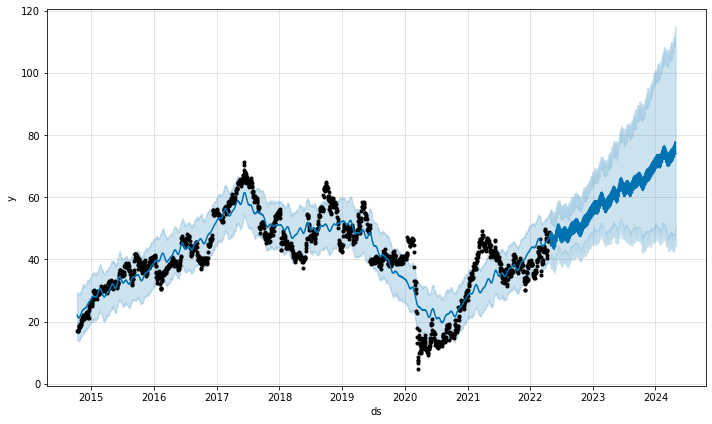

In [14]:
# dave & buster's
forecast('PLAY', 365 * 2).tail()

,ds,yhat,yhat_lower,yhat_upper
9108,2022-04-30,265.434756,247.718364,284.270538
9109,2022-05-01,265.484014,247.873827,282.899177
9110,2022-05-02,265.350328,247.544752,282.885934
9111,2022-05-03,265.418640,247.429598,283.328797
9112,2022-05-04,265.516328,248.558082,282.021417
...,...,...,...,...
9468,2023-04-25,301.719822,282.289604,318.695408
9469,2023-04-26,301.837491,282.980059,320.480234
9470,2023-04-27,301.815721,282.832338,319.113903
9471,2023-04-28,301.808849,282.844927,319.648397


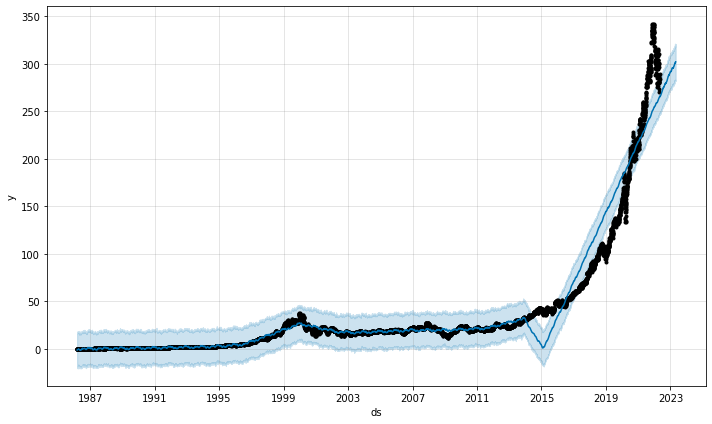

In [16]:
n = 365  # set variable for number of days to predict

# microsoft
snap_forecast = forecast('MSFT', n)

# only keep the future forecast, and forget most columns
snap_forecast = snap_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)

snap_forecast